In [18]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [24]:

def cost(u,u_bar):
    return 0.5*(np.linalg.norm(u-u_bar))**2

def A(n):
    h = 1/(n+1)
    A = np.eye(n) * 2  # create an identity matrix and multiply it by 2
    A = A + np.diag([-1]*(n-1), k=1) + np.diag([-1]*(n-1), k=-1) # set the off-diagonal elements to -1
    return (1/h**2)*A

def G(u):
    return u**3

def jacG(u,n):
    return np.eye(n)*(3*u**2)

# def dLdu(u,u_bar,lambdas):
#     return u-u_bar-(A(n)+jacG(u)).T*lambdas

# def dLdalpha(n,lambdas):
#     return np.ones(n).T*lambdas

# def dLdlam(n,u,alpha):
#     A(n)*u+G(u)-alpha*np.ones(n)



In [110]:
def lmbvpoptim(u_bar,n=99):
    #initial guess for fsolve
    x0 = np.ones((2*n)+1) #I think parentheses make it more readable
    def func(x): #x is our initial guess
        u,lambdas,alpha = x[:n],x[n:2*n],x[-1]
        # add partial derivatives to the vector
        # dLdu
        x[:n] = u-u_bar-(A(n)+jacG(u,n))@lambdas
        # dLdlam
        x[n:2*n] = A(n)@u+G(u)-(alpha*np.ones(n))
        # dLdalpha
        x[-1] = np.ones(n).T@lambdas
        print(x)
        return x
    # shove the vector into fsolve
    solution = fsolve(func,x0)
    alpha_star = solution[-1]
    u_star = solution[:n]
    lambda_star = solution[n:2*n]
    f_star = cost(u_star,u_bar)
    return alpha_star,u_star,lambda_star,f_star

In [ ]:
#define the inputs
n = 99
x = np.linspace(0, 1, n+1)[1:] #this defines our increment
a = np.sin(np.pi*x)
b = np.sin(2*np.pi*x)**2


alphaa,u_stara,lambda_stara,f_stara=lmbvpoptim(a)
#alphab,u_starb,lambda_starb,f_starb=lmbvpoptim(b)

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def cost(u, u_bar):
    return 0.5 * np.linalg.norm(u - u_bar)**2

def A(n):
    h = 1 / (n + 1)
    A = np.eye(n) * 2  # create an identity matrix and multiply it by 2
    A = A + np.diag([-1] * (n - 1), k=1) + np.diag([-1] * (n - 1), k=-1) # set the off-diagonal elements to -1
    return (1 / h**2) * A

def G(u):
    return u**3

def jacG(u,n):
    return np.eye(n)*(3 * u**2) #jacG is a diagonal matrix

def lmbvpoptim(u_bar, n=99):
    # initial guess for fsolve
    x0 = np.zeros((2 * n) + 1)  # I think parentheses make it more readable

    def func(x):  # x is our initial guess
        u, lambdas, alpha = x[:n], x[n:2*n], x[-1]
        # add partial derivatives to the vector
        # dLdu
        dLdu = u - u_bar - (A(n) + jacG(u,n)) @ lambdas
        # dLdlam
        dLdlam = A(n) @ u + G(u) - alpha * np.ones(n)
        # dLdalpha
        dLdalpha = np.ones(n).T @ lambdas
        return np.concatenate([dLdu, dLdlam, [dLdalpha]])

    # shove the vector into fsolve
    solution = fsolve(func, x0)

    alpha_star = solution[-1]
    u_star = solution[:n]
    lambda_star = solution[n:2 * n]
    f_star = cost(u_star, u_bar)
    return alpha_star, u_star, lambda_star, f_star

#define the inputs
n = 99
x = np.linspace(0, 1, n + 1)[1:] #this defines our increment
a = np.sin(np.pi * x)
b = np.sin(2 * np.pi * x) ** 2

alphaa, u_stara, lambda_stara, f_stara = lmbvpoptim(a)
alphab, u_starb, lambda_starb, f_starb = lmbvpoptim(b)

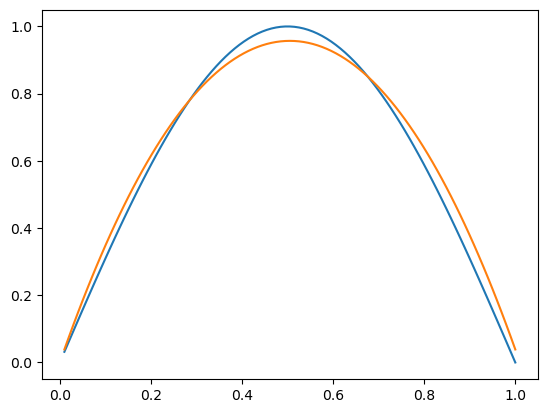

In [121]:
plt.plot(x,a)
plt.plot(x,u_stara)


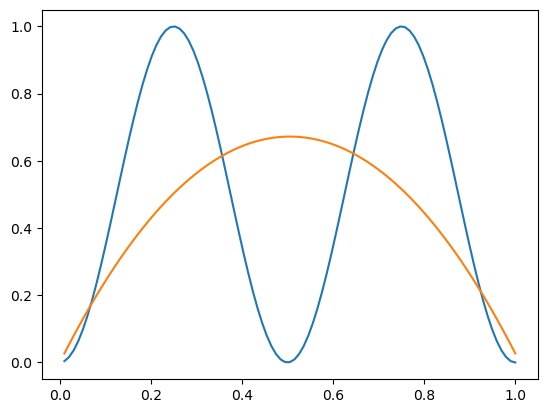

In [122]:
plt.plot(x,b)
plt.plot(x,u_starb)